# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [15]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [1]:
# 연설문1 노무현 대통령 취임사
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Roh.txt", 'r', encoding='euc-kr')
message_of_roh = f.read()
print(message_of_roh)
f.close()

존경하는 국민 여러분. 오늘 저는 대한민국의 제16대 대통령에 취임하기 위해 이 자리에 섰습니다.
국민 여러분의 위대한 선택으로, 저는 대한민국의 새 정부를 운영할 영광스러운 책임을 맡게 되었습니다.
국민 여러분께 뜨거운 감사를 올리면서, 이 벅찬 소명을 국민여러분과 함께 완수해 나갈 것임을 약속드립니다.
아울러 이 자리에 참석해 주신 김대중 대통령을 비롯한 전임 대통령 여러분, 고이즈미 준이치로 일본총리를 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 심심한 감사를 드립니다.
특별히 이 자리를 빌려, 대구 지하철 참사 희생자 여러분의 명복을 빌면서, 유가족 여러분께도 깊은 위로를 드립니다.
다시는 이런 불행이 되풀이되지 않게, 재난관리체계를 전면 점검하고 획기적으로 개선해 안전한 사회를 만들도록 최선을 다하겠습니다.
국민 여러분. 우리의 역사는 도전과 극복의 연속이었습니다.
열강의 틈에 놓인 한반도에서 한고난을 이겨내고, 반만년 동안 민족의 자존과 독자적 문화를 지켜왔습니다.
해방 이후에는 분단과 전쟁과 가난을 딛고, 반세기만에 세계 열두 번째의 경제 강국을 건설했습니다.
우리는 농경시대에서 산업화를 거쳐 지식정보화 시대에 성공적으로 진입했습니다.
그러나 지금 우리는 다시 세계사적 전환점에 직면했습니다.
도약이냐 후퇴냐,평화냐 긴장이냐의 갈림길에 서 있습니다.
세계의 안보 상황이 불안합니다.
이라크 정세가 긴박합니다.
특히 북한 핵 문제를 둘러싼 국제사회의 우려가 고조되고 있습니다.
이럴수록 우리는 평화를 지키고더욱 굳건히 뿌리내리게 해야 합니다.
대외 경제 환경도 어려워지고 있습니다.
선진국들은 끝없이 새로운 영역을 개척하며 뻗어가고 있습니다.
후발국들은 무섭게 추격해 옵니다.
우리는 새로운 성장 동력과 발전 전략을 요구받고 있습니다.
우리 사회 내부에도 국가의 명운을 결정지을 많은 문제들이 가로놓여 있습니다.
이들 과제는 국민 여러분의 지혜와 결단을 기다리고 있습니다.
이 모든 도전을 극복해야 합니다.
우리는 해낼 수 있습니다.
우리 국민이 힘을합

In [2]:
# 연설문2 이명박 대통령 취임사
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Lee.txt", 'r', encoding='euc-kr')
message_of_lee = f.read()
print(message_of_lee)
f.close()

 존경하는 국민 여러분, 700만 해외동포 여러분. 
이 자리에 참석하신 노무현, 김대중, 김영삼, 전두환 전 대통령, 그리고 이슬람 카리모프 우즈베키스탄 대통령, 엥흐바야르 남바르 몽골 대통령, 삼덱 훈센 캄보디아 총리, 후쿠다 야스오 일본 내각총리대신, 빅토르 줍코프 러시아연방 총리, 무하마드 유수프 칼라 인도네시아 부통령을 비롯한 각국 경축사절과 내외 귀빈 여러분, 
감사합니다. 
저는 오늘 국민 여러분의 부름을 받고 대한민국의 제17대 대통령에 취임합니다.
한없이 자랑스러운 나라, 한없이 위대한 국민 앞에 엄숙한 마음으로 경의를 표하며 제게 주어진 역사적, 시대적 사명에 신명을 바칠 것을 굳게 다짐합니다. 
저는 이 자리에서 국민 여러분께 약속드립니다. 국민을 섬겨 나라를 편안하게 하겠습니다. 경제를 발전시키고 사회를 통합하겠습니다. 문화를 창달하고 과학기술을 발전시키겠습니다. 안보를 튼튼히 하고 평화 통일의 기반을 다지겠습니다. 국제사회에 책임을 다하고 인류공영에 이바지하겠습니다.
올해로 대한민국 건국 60주년을 맞이합니다. 우리는 잃었던 땅을 되찾아 나라를 세웠고, 그 나라를 지키려고 목숨을 걸었습니다. 모두가 하나같이 열심히 살았습니다.
그리하여 세계 역사상 최단기간에 산업화와 민주화라는 과업을 동시에 이루어 내었습니다. 오로지 우리의 의지와 우리의 힘으로 일구었습니다. 
지구상에서 가장 가난했던 나라가 세계 10위권의 경제대국이 되었습니다.
도움을 받는 나라에서 베푸는 나라로 올라섰습니다. 이제 선진국들과 어깨를 나란히 할 수 있게 되었습니다. 
남들은 이것을 ‘기적’이라고 부릅니다. ‘신화’라고도 합니다. 그러나 우리는 알고 있습니다. 그것은 기적이 아니라, 우리가 다 함께 흘린 피와 땀과 눈물의 결정입니다.
그것은 신화가 아니라, 우리가 살아온 진실한 삶의 이야기입니다.
독립을 위해 목숨을 바친 선열들, 전선에서 산화한 장병들, 뙤약볕, 비바람 속에 땅을 일군 농민들, 밤낮없이 산업현장을 지켜낸 근로자들, 젊음을 바쳐 민주화를 일구어낸 청년들

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [3]:
# 연설문 1번 전처리
message_of_roh = message_of_roh.split('\n\n')
message_of_roh

["존경하는 국민 여러분. 오늘 저는 대한민국의 제16대 대통령에 취임하기 위해 이 자리에 섰습니다.\n국민 여러분의 위대한 선택으로, 저는 대한민국의 새 정부를 운영할 영광스러운 책임을 맡게 되었습니다.\n국민 여러분께 뜨거운 감사를 올리면서, 이 벅찬 소명을 국민여러분과 함께 완수해 나갈 것임을 약속드립니다.\n아울러 이 자리에 참석해 주신 김대중 대통령을 비롯한 전임 대통령 여러분, 고이즈미 준이치로 일본총리를 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 심심한 감사를 드립니다.\n특별히 이 자리를 빌려, 대구 지하철 참사 희생자 여러분의 명복을 빌면서, 유가족 여러분께도 깊은 위로를 드립니다.\n다시는 이런 불행이 되풀이되지 않게, 재난관리체계를 전면 점검하고 획기적으로 개선해 안전한 사회를 만들도록 최선을 다하겠습니다.\n국민 여러분. 우리의 역사는 도전과 극복의 연속이었습니다.\n열강의 틈에 놓인 한반도에서 한고난을 이겨내고, 반만년 동안 민족의 자존과 독자적 문화를 지켜왔습니다.\n해방 이후에는 분단과 전쟁과 가난을 딛고, 반세기만에 세계 열두 번째의 경제 강국을 건설했습니다.\n우리는 농경시대에서 산업화를 거쳐 지식정보화 시대에 성공적으로 진입했습니다.\n그러나 지금 우리는 다시 세계사적 전환점에 직면했습니다.\n도약이냐 후퇴냐,평화냐 긴장이냐의 갈림길에 서 있습니다.\n세계의 안보 상황이 불안합니다.\n이라크 정세가 긴박합니다.\n특히 북한 핵 문제를 둘러싼 국제사회의 우려가 고조되고 있습니다.\n이럴수록 우리는 평화를 지키고더욱 굳건히 뿌리내리게 해야 합니다.\n대외 경제 환경도 어려워지고 있습니다.\n선진국들은 끝없이 새로운 영역을 개척하며 뻗어가고 있습니다.\n후발국들은 무섭게 추격해 옵니다.\n우리는 새로운 성장 동력과 발전 전략을 요구받고 있습니다.\n우리 사회 내부에도 국가의 명운을 결정지을 많은 문제들이 가로놓여 있습니다.\n이들 과제는 국민 여러분의 지혜와 결단을 기다리고 있습니다.\n이 모든 도전을 극복해야 합니다.\n

In [4]:
# 연설문 2번 전처리
message_of_lee = message_of_lee.split('\n\n')
message_of_lee

[' 존경하는 국민 여러분, 700만 해외동포 여러분. \n이 자리에 참석하신 노무현, 김대중, 김영삼, 전두환 전 대통령, 그리고 이슬람 카리모프 우즈베키스탄 대통령, 엥흐바야르 남바르 몽골 대통령, 삼덱 훈센 캄보디아 총리, 후쿠다 야스오 일본 내각총리대신, 빅토르 줍코프 러시아연방 총리, 무하마드 유수프 칼라 인도네시아 부통령을 비롯한 각국 경축사절과 내외 귀빈 여러분, \n감사합니다. \n저는 오늘 국민 여러분의 부름을 받고 대한민국의 제17대 대통령에 취임합니다.\n한없이 자랑스러운 나라, 한없이 위대한 국민 앞에 엄숙한 마음으로 경의를 표하며 제게 주어진 역사적, 시대적 사명에 신명을 바칠 것을 굳게 다짐합니다. \n저는 이 자리에서 국민 여러분께 약속드립니다. 국민을 섬겨 나라를 편안하게 하겠습니다. 경제를 발전시키고 사회를 통합하겠습니다. 문화를 창달하고 과학기술을 발전시키겠습니다. 안보를 튼튼히 하고 평화 통일의 기반을 다지겠습니다. 국제사회에 책임을 다하고 인류공영에 이바지하겠습니다.\n올해로 대한민국 건국 60주년을 맞이합니다. 우리는 잃었던 땅을 되찾아 나라를 세웠고, 그 나라를 지키려고 목숨을 걸었습니다. 모두가 하나같이 열심히 살았습니다.\n그리하여 세계 역사상 최단기간에 산업화와 민주화라는 과업을 동시에 이루어 내었습니다. 오로지 우리의 의지와 우리의 힘으로 일구었습니다. \n지구상에서 가장 가난했던 나라가 세계 10위권의 경제대국이 되었습니다.\n도움을 받는 나라에서 베푸는 나라로 올라섰습니다. 이제 선진국들과 어깨를 나란히 할 수 있게 되었습니다. \n남들은 이것을 ‘기적’이라고 부릅니다. ‘신화’라고도 합니다. 그러나 우리는 알고 있습니다. 그것은 기적이 아니라, 우리가 다 함께 흘린 피와 땀과 눈물의 결정입니다.\n그것은 신화가 아니라, 우리가 살아온 진실한 삶의 이야기입니다.\n독립을 위해 목숨을 바친 선열들, 전선에서 산화한 장병들, 뙤약볕, 비바람 속에 땅을 일군 농민들, 밤낮없이 산업현장을 지켜낸 근로자들, 젊음을 바쳐

In [16]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_roh)
tf_bow1 = tf_vectorizer.fit_transform(message_of_roh)
tf_bow1

<1x815 sparse matrix of type '<class 'numpy.int64'>'
	with 815 stored elements in Compressed Sparse Row format>

In [17]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_lee)
tf_bow2 = tf_vectorizer.fit_transform(message_of_lee)
tf_bow2

<1x1368 sparse matrix of type '<class 'numpy.int64'>'
	with 1368 stored elements in Compressed Sparse Row format>

In [18]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

815
815


['10년',
 '10위권의',
 '1차산업으로',
 '2008년을',
 '20년',
 '21세기의',
 '2차',
 '3000',
 '3000달러에',
 '30년을',
 '3차산업으로',
 '60년을',
 '60년의',
 '60주년을',
 '700만',
 '7천만',
 'oda',
 'pko',
 'un',
 '가겠습니다',
 '가꾸고',
 '가난의',
 '가난해도',
 '가난했던',
 '가는',
 '가능성을',
 '가능한',
 '가동하기',
 '가르쳐야',
 '가슴을',
 '가야',
 '가장',
 '가져야',
 '가져온다',
 '가지고',
 '가진',
 '가치로',
 '가치를',
 '각국',
 '각오를',
 '각자가',
 '갈등과',
 '갈림길에서',
 '감사하는',
 '감사합니다',
 '강경투쟁을',
 '강화시키겠습니다',
 '강화하는',
 '강화하여',
 '갖게',
 '개발하고',
 '개방과',
 '개방에',
 '개방의',
 '개선될',
 '개선은',
 '개선하겠습니다',
 '개선하고',
 '개인',
 '개인과',
 '개척에도',
 '개편하고자',
 '거대기술에',
 '거스르면',
 '거쳐',
 '거침없이',
 '걱정이',
 '걱정입니다',
 '건강성과',
 '건강하고',
 '건강해집니다',
 '건국',
 '걷고',
 '걸맞게',
 '걸었습니다',
 '것들과',
 '것은',
 '것을',
 '것이',
 '것입니다',
 '것처럼',
 '겨울',
 '격조가',
 '겪게',
 '결국',
 '결별합시다',
 '결실을',
 '결정입니다',
 '결합시켜',
 '경영과',
 '경영으로',
 '경영하는',
 '경우든',
 '경의를',
 '경쟁력',
 '경쟁력을',
 '경쟁을',
 '경쟁의',
 '경쟁하도록',
 '경쟁해야',
 '경제',
 '경제가',
 '경제규모와',
 '경제대국이',
 '경제를',
 '경제의',
 '경제적',
 '경찰은',
 '경축사절과',
 '계기로',
 '계속될',
 '계층간',
 '계층갈등을',
 '고령자를',
 '고령화',
 '고루',
 '고

In [15]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

392
392


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [20]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['1을', '20세기의', '21세기', '21세기는', '21세기에는', '3국에만', '4강', '50주년입니다', '5분의', '가고', '가기', '가까워지도록', '가난을', '가능한', '가로놓여', '가장', '가져야', '가지고', '각국의', '갇혀', '갈등이아니라', '갈림길에', '감사를', '감사하고', '감사합니다', '강구하겠습니다', '강구하고자', '강국을', '강요받기도', '강조하고자', '강화할', '갖고', '갖추어가고', '같은', '개발', '개발은', '개방화', '개선을', '개선해', '개척하며', '개혁과', '개혁은', '개혁해', '거듭', '거듭날', '거쳐', '건강을', '건강하고', '건설했습니다', '것은', '것을', '것이', '것이라는', '것인지', '것인지를', '것임을', '것입니다', '것처럼', '격차를', '결단을', '결의로', '결정지을', '결정하지', '경제', '경제규모는', '경제발전에', '경제에서', '경제의', '경제지원을약속받을', '경축', '계승하고', '계층간', '계획을', '계획을포기해야', '고급', '고령사회의', '고속철도', '고이즈미', '고조되고', '고조되어서는', '고통을', '공동번영을', '공동체', '공생의', '공정과', '공정하고', '공조를', '과제가', '과제는', '과제로', '과제를', '과학기술', '과학기술을', '관계도', '관계로', '관문으로', '관심을', '괄목할', '광범위한', '광양항과', '교류가', '교육과', '교육도', '구비해', '구조적', '구축되게하는', '구현되어야', '국가균형발전은', '국가들과의', '국가목표에', '국가의', '국리민복을', '국민', '국민과', '국민여러분과', '국민은', '국민이', '국민입니다', '국민적', '국민참여를', '국민통합은', '국정운영의', '국제사회는', '국제사회의', '국제협력을', '군사적', '굳건히', '굳게', '굴절된', '귀빈'

array([ 1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  2,  8,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1, 10,  2,  1,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  4,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  6,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1

In [21]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['10년', '10위권의', '1차산업으로', '2008년을', '20년', '21세기의', '2차', '3000', '3000달러에', '30년을', '3차산업으로', '60년을', '60년의', '60주년을', '700만', '7천만', 'oda', 'pko', 'un', '가겠습니다', '가꾸고', '가난의', '가난해도', '가난했던', '가는', '가능성을', '가능한', '가동하기', '가르쳐야', '가슴을', '가야', '가장', '가져야', '가져온다', '가지고', '가진', '가치로', '가치를', '각국', '각오를', '각자가', '갈등과', '갈림길에서', '감사하는', '감사합니다', '강경투쟁을', '강화시키겠습니다', '강화하는', '강화하여', '갖게', '개발하고', '개방과', '개방에', '개방의', '개선될', '개선은', '개선하겠습니다', '개선하고', '개인', '개인과', '개척에도', '개편하고자', '거대기술에', '거스르면', '거쳐', '거침없이', '걱정이', '걱정입니다', '건강성과', '건강하고', '건강해집니다', '건국', '걷고', '걸맞게', '걸었습니다', '것들과', '것은', '것을', '것이', '것입니다', '것처럼', '겨울', '격조가', '겪게', '결국', '결별합시다', '결실을', '결정입니다', '결합시켜', '경영과', '경영으로', '경영하는', '경우든', '경의를', '경쟁력', '경쟁력을', '경쟁을', '경쟁의', '경쟁하도록', '경쟁해야', '경제', '경제가', '경제규모와', '경제대국이', '경제를', '경제의', '경제적', '경찰은', '경축사절과', '계기로', '계속될', '계층간', '계층갈등을', '고령자를', '고령화', '고루', '고비를', '고통스럽더라도', '고통을', '고학생', '곳에는', '곳은', '공간', '공간에서', '공공복지를', '공공부문에도', '공공의', '공교육이', '공동번영을', '공동의', '공동체가', '

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'1을': 1,
 '20세기의': 1,
 '21세기': 3,
 '21세기는': 1,
 '21세기에는': 1,
 '3국에만': 1,
 '4강': 1,
 '50주년입니다': 1,
 '5분의': 1,
 '가고': 1,
 '가기': 1,
 '가까워지도록': 1,
 '가난을': 1,
 '가능한': 1,
 '가로놓여': 1,
 '가장': 2,
 '가져야': 1,
 '가지고': 1,
 '각국의': 1,
 '갇혀': 1,
 '갈등이아니라': 1,
 '갈림길에': 1,
 '감사를': 2,
 '감사하고': 1,
 '감사합니다': 1,
 '강구하겠습니다': 1,
 '강구하고자': 1,
 '강국을': 1,
 '강요받기도': 1,
 '강조하고자': 1,
 '강화할': 1,
 '갖고': 1,
 '갖추어가고': 1,
 '같은': 1,
 '개발': 3,
 '개발은': 1,
 '개방화': 1,
 '개선을': 1,
 '개선해': 2,
 '개척하며': 1,
 '개혁과': 2,
 '개혁은': 1,
 '개혁해': 1,
 '거듭': 1,
 '거듭날': 1,
 '거쳐': 2,
 '건강을': 1,
 '건강하고': 1,
 '건설했습니다': 1,
 '것은': 1,
 '것을': 1,
 '것이': 2,
 '것이라는': 1,
 '것인지': 1,
 '것인지를': 1,
 '것임을': 2,
 '것입니다': 8,
 '것처럼': 1,
 '격차를': 1,
 '결단을': 1,
 '결의로': 1,
 '결정지을': 1,
 '결정하지': 1,
 '경제': 2,
 '경제규모는': 1,
 '경제발전에': 1,
 '경제에서': 1,
 '경제의': 2,
 '경제지원을약속받을': 1,
 '경축': 1,
 '계승하고': 1,
 '계층간': 1,
 '계획을': 1,
 '계획을포기해야': 1,
 '고급': 1,
 '고령사회의': 1,
 '고속철도': 1,
 '고이즈미': 1,
 '고조되고': 1,
 '고조되어서는': 1,
 '고통을': 1,
 '공동번영을': 1,
 '공동체': 2,
 '공생의': 1,
 '공정과': 1,
 '공정하고': 1

In [23]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'10년': 2,
 '10위권의': 1,
 '1차산업으로': 1,
 '2008년을': 1,
 '20년': 1,
 '21세기의': 1,
 '2차': 1,
 '3000': 1,
 '3000달러에': 1,
 '30년을': 1,
 '3차산업으로': 1,
 '60년을': 1,
 '60년의': 1,
 '60주년을': 1,
 '700만': 1,
 '7천만': 2,
 'oda': 1,
 'pko': 1,
 'un': 1,
 '가겠습니다': 2,
 '가꾸고': 1,
 '가난의': 1,
 '가난해도': 1,
 '가난했던': 1,
 '가는': 2,
 '가능성을': 1,
 '가능한': 1,
 '가동하기': 1,
 '가르쳐야': 1,
 '가슴을': 1,
 '가야': 1,
 '가장': 1,
 '가져야': 1,
 '가져온다': 1,
 '가지고': 3,
 '가진': 1,
 '가치로': 1,
 '가치를': 3,
 '각국': 1,
 '각오를': 1,
 '각자가': 2,
 '갈등과': 1,
 '갈림길에서': 1,
 '감사하는': 1,
 '감사합니다': 2,
 '강경투쟁을': 1,
 '강화시키겠습니다': 1,
 '강화하는': 1,
 '강화하여': 1,
 '갖게': 1,
 '개발하고': 1,
 '개방과': 1,
 '개방에': 1,
 '개방의': 1,
 '개선될': 1,
 '개선은': 1,
 '개선하겠습니다': 3,
 '개선하고': 1,
 '개인': 1,
 '개인과': 1,
 '개척에도': 1,
 '개편하고자': 1,
 '거대기술에': 1,
 '거스르면': 1,
 '거쳐': 1,
 '거침없이': 1,
 '걱정이': 2,
 '걱정입니다': 1,
 '건강성과': 1,
 '건강하고': 2,
 '건강해집니다': 1,
 '건국': 1,
 '걷고': 1,
 '걸맞게': 1,
 '걸었습니다': 1,
 '것들과': 1,
 '것은': 1,
 '것을': 2,
 '것이': 2,
 '것입니다': 14,
 '것처럼': 1,
 '겨울': 1,
 '격조가': 1,
 '겪게': 1,
 '결국': 1,
 '결별합시다': 1,


### 시각화

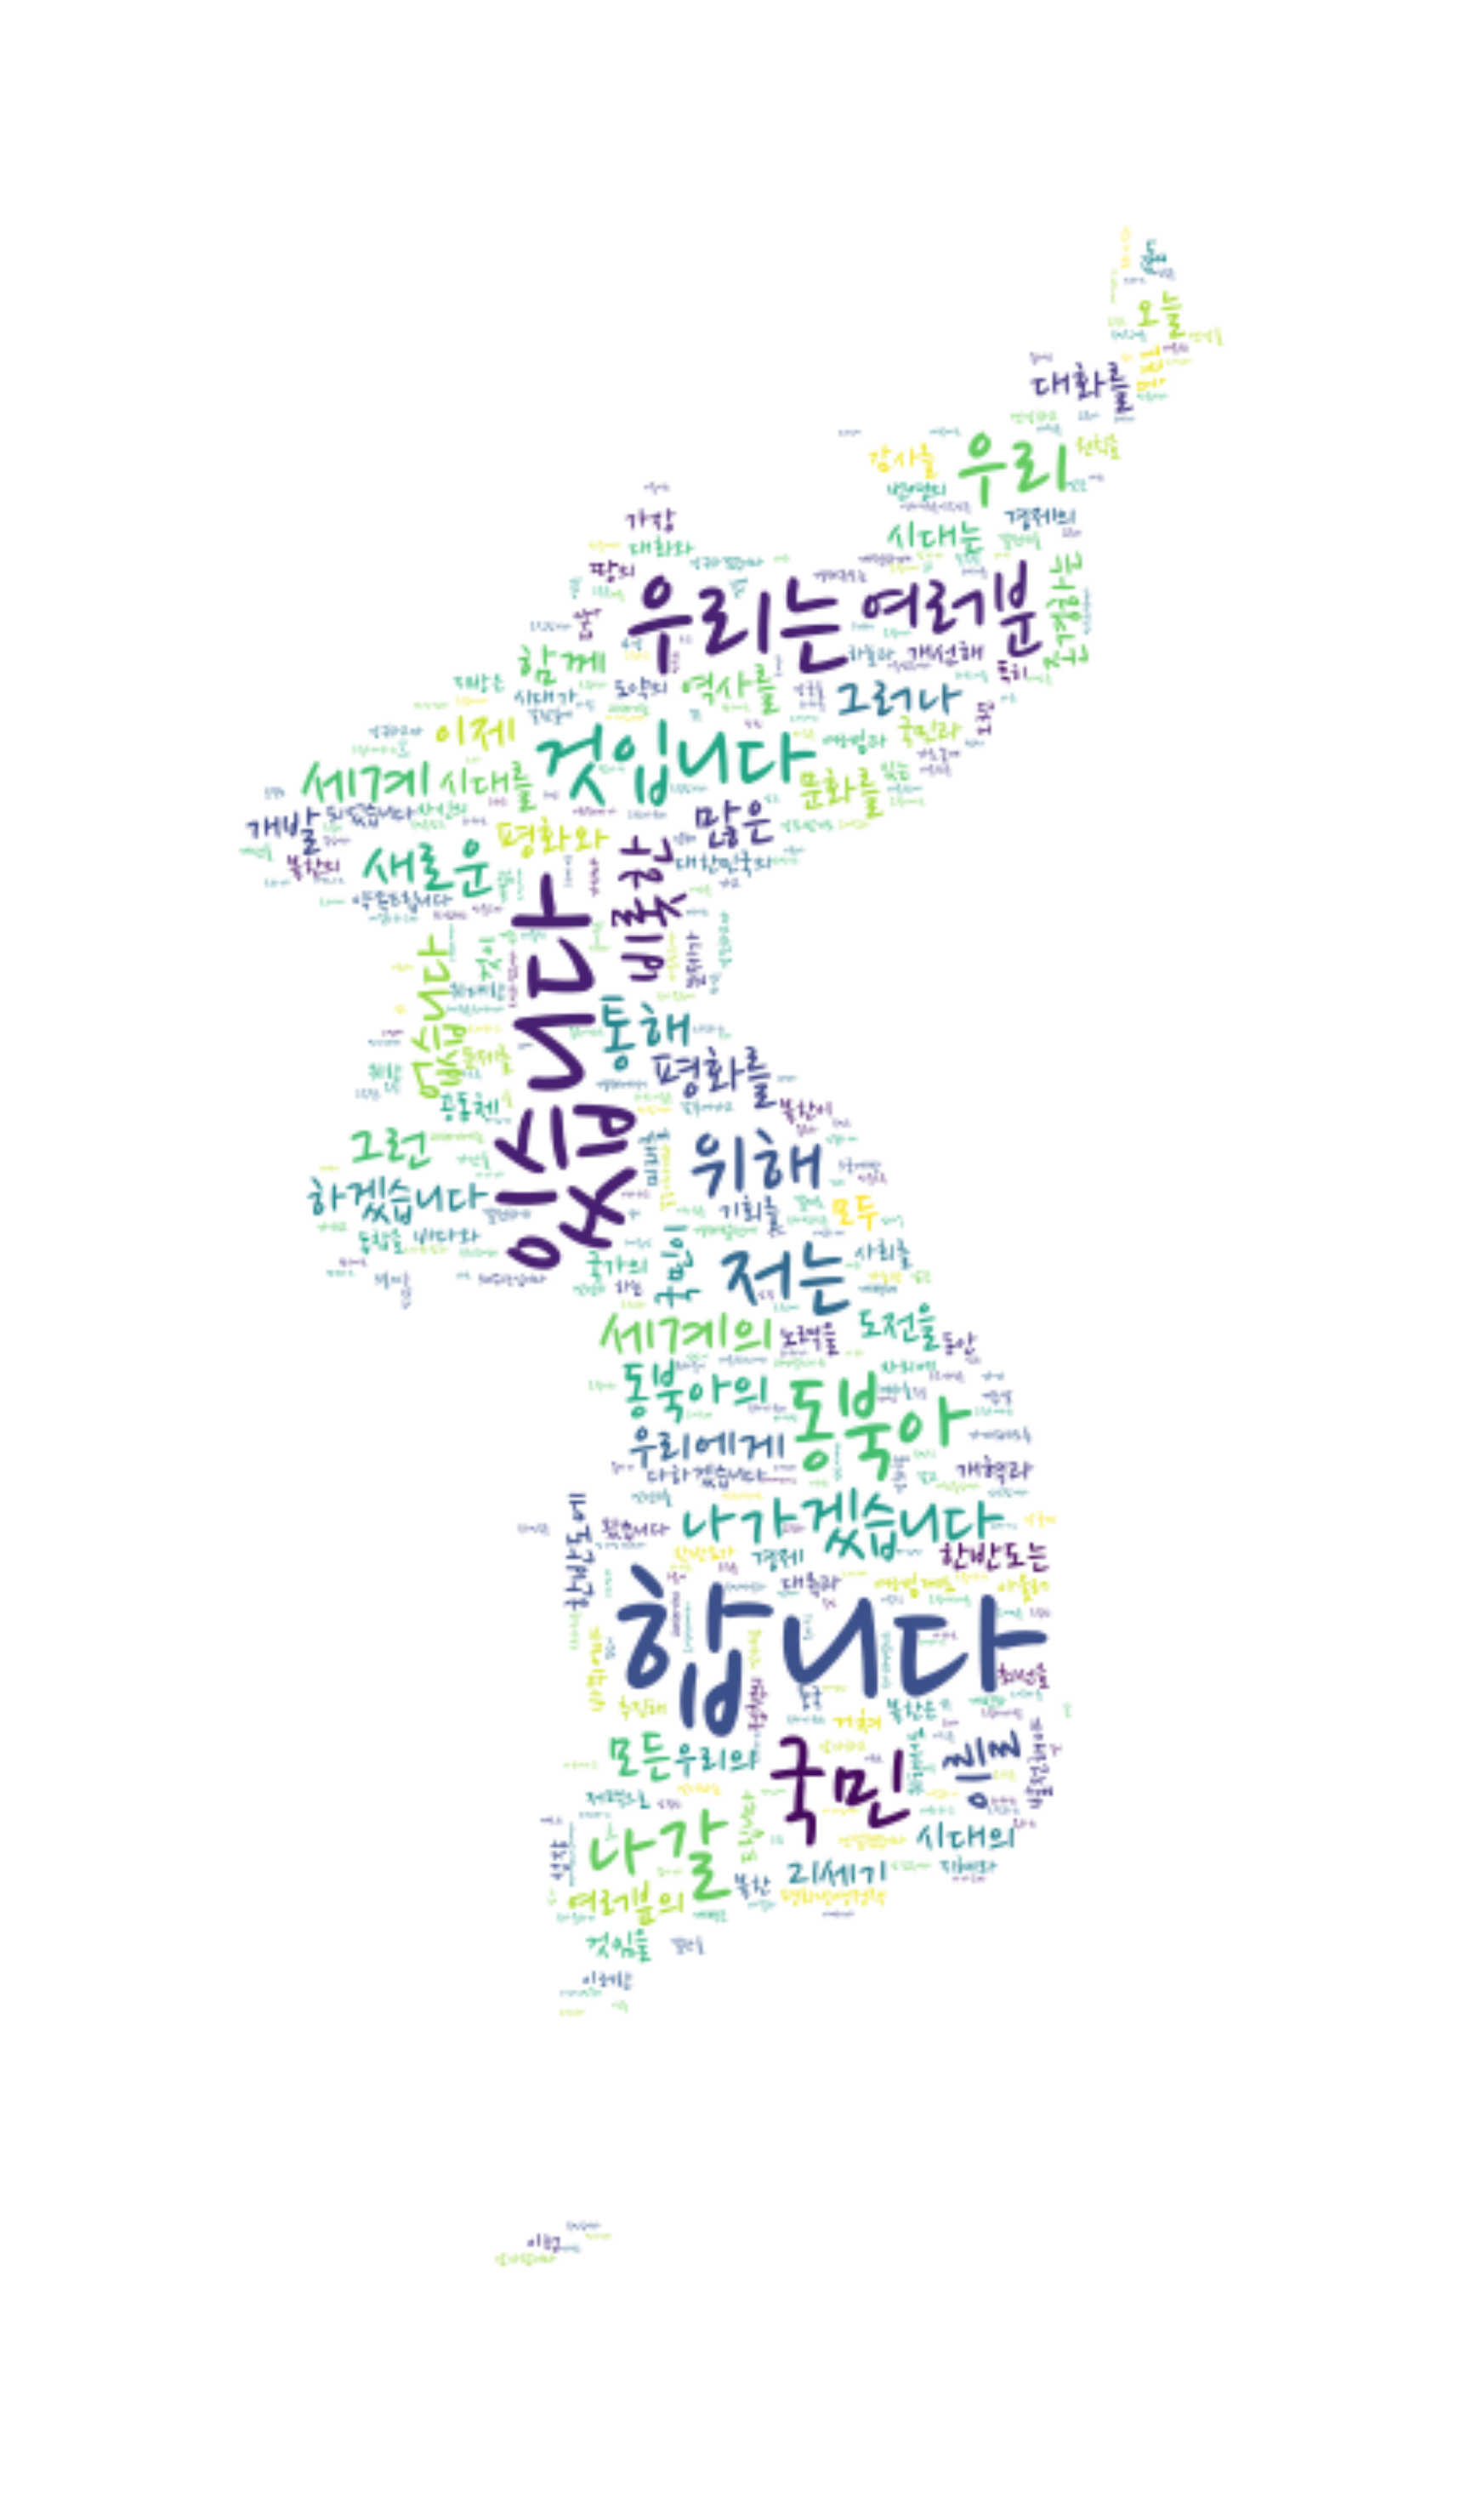

In [29]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("RohSpeech.png") # 그림파일로 추출하기

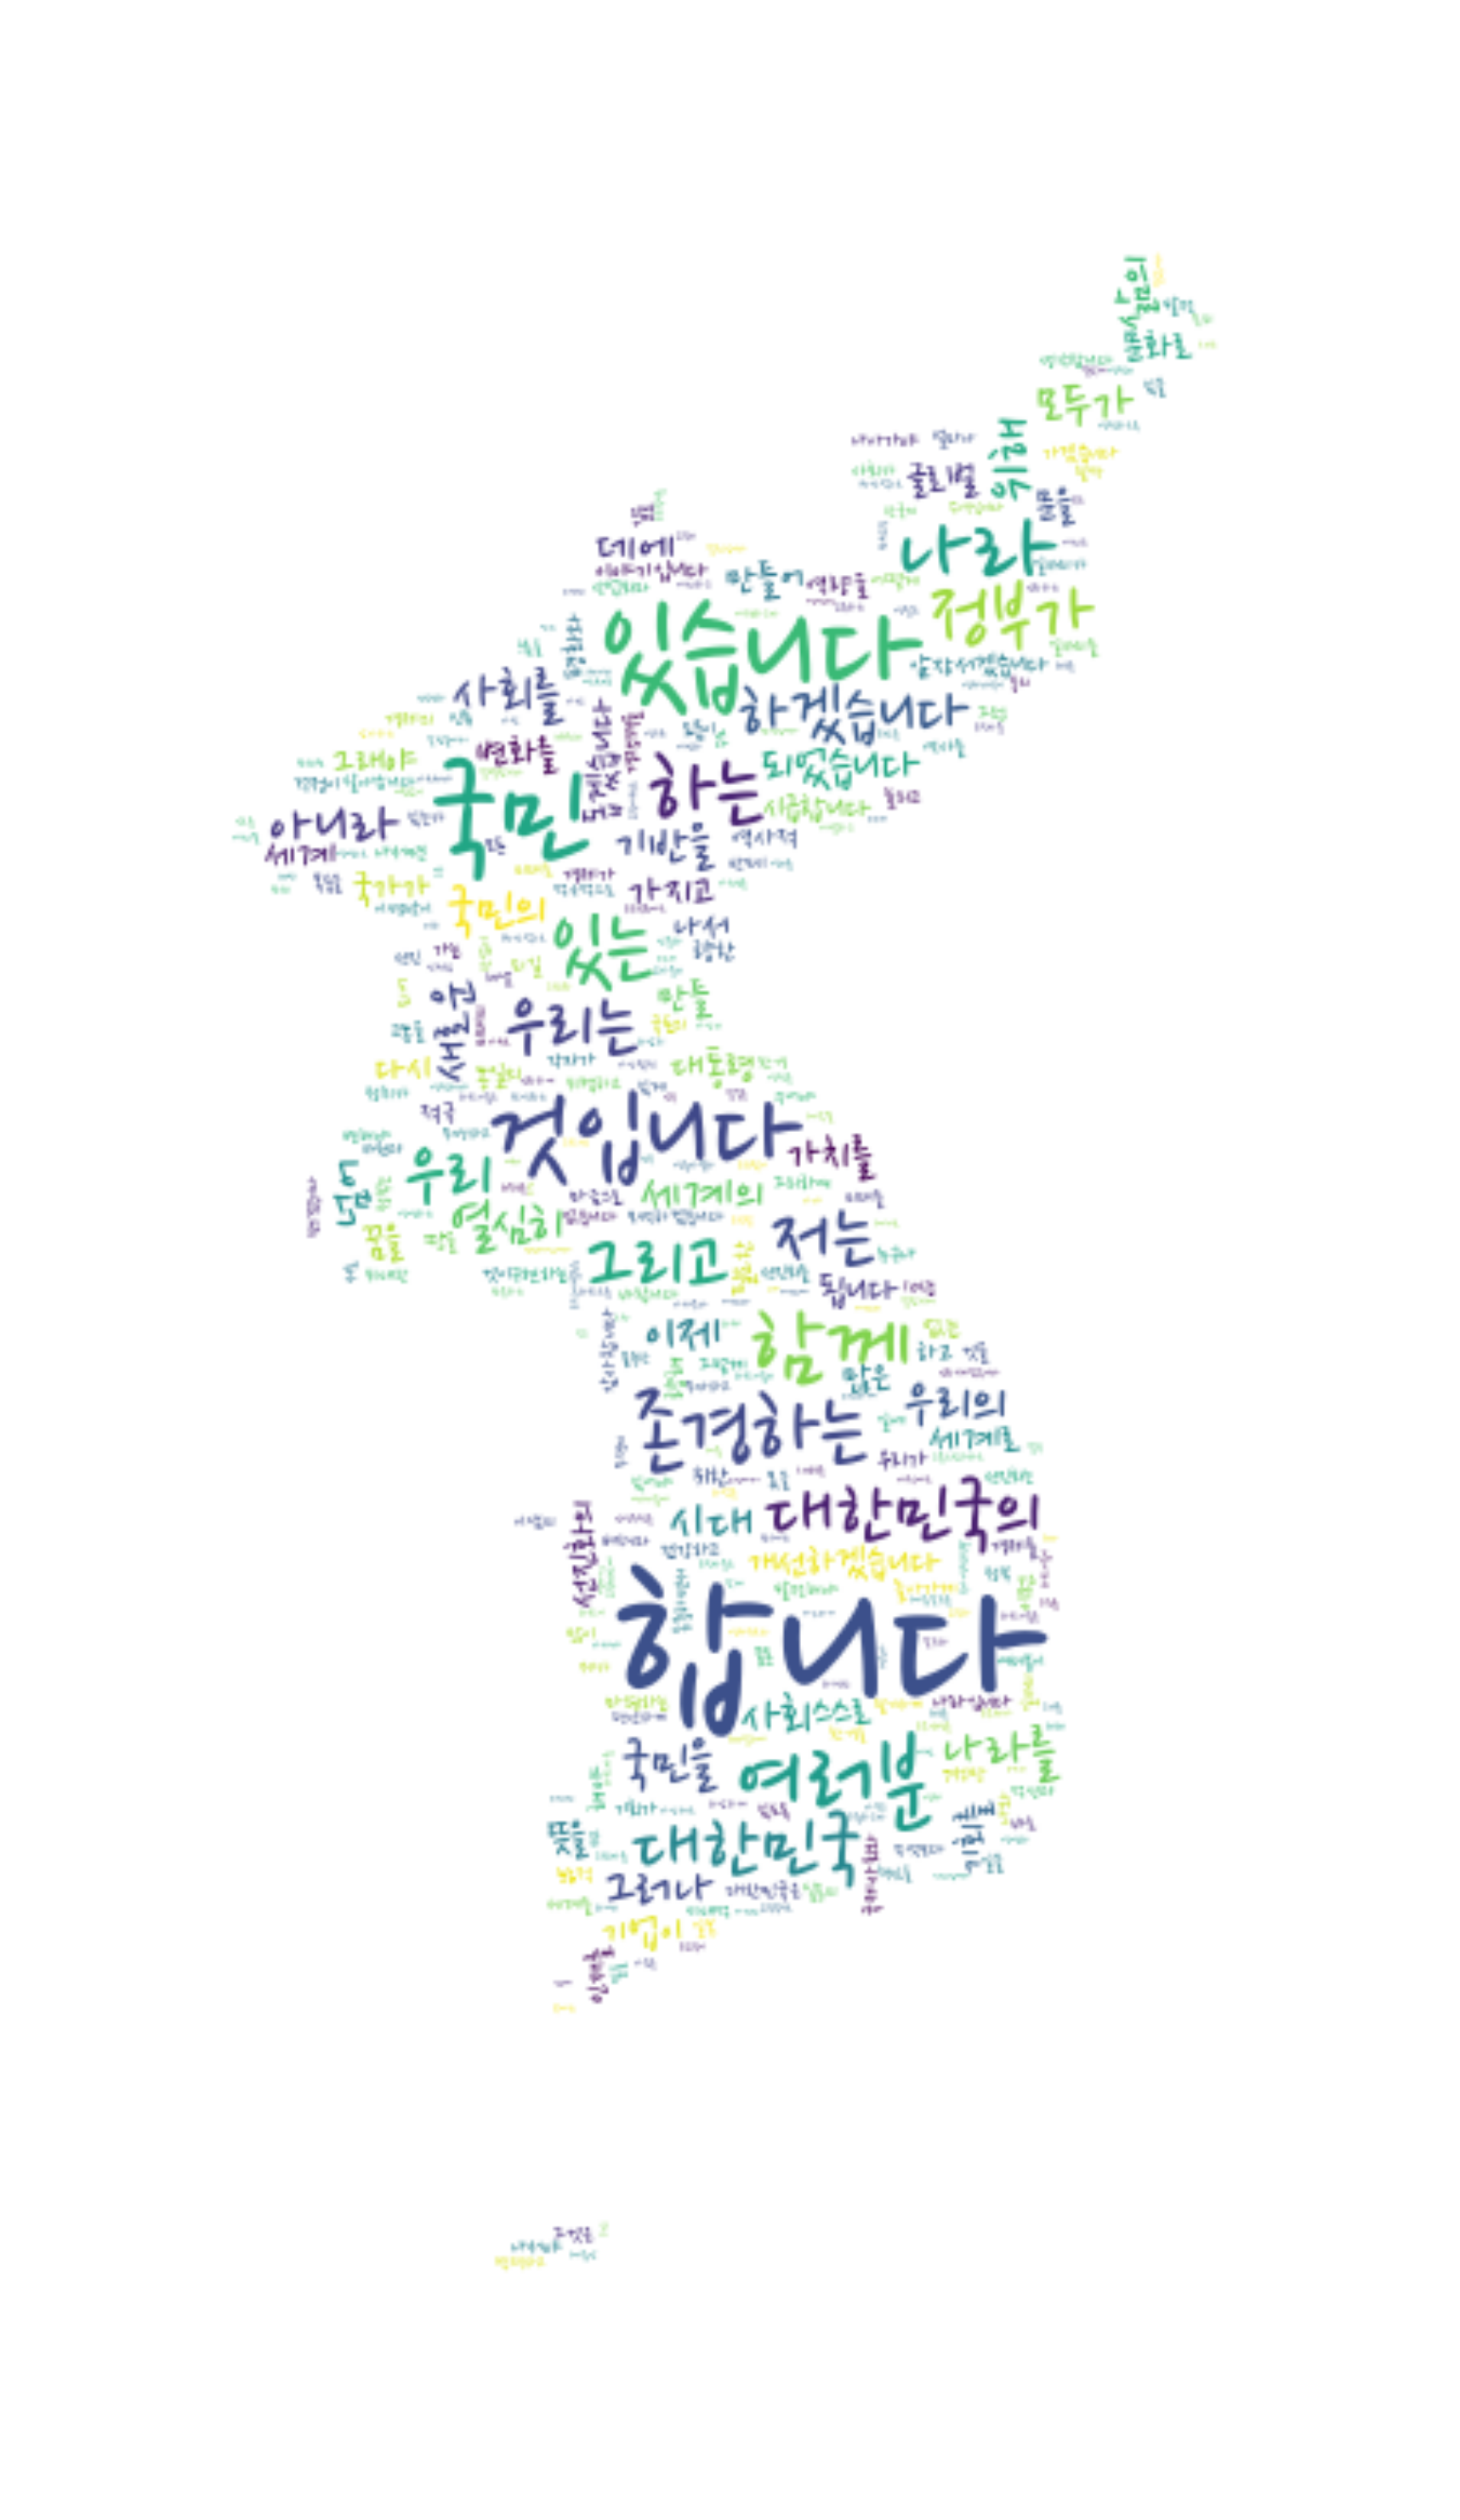

In [31]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("LeeSpeech.png") # 그림파일로 추출하기